# Airline Analysis

- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Establishing Dataset

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading In Data

In [3]:
flight = pd.read_csv("flight.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)

### Previewing Data

In [62]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


### Data Information

In [63]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


### Data Description

In [45]:
flight.describe(include='all')

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


### Sample Dataset For Analysis

In [122]:
flight_dataset_sample = flight.sample(n=500)

## Univariate Analysis

### High & Low Values For Coach & First Class

In [49]:
coach_high_val = np.max(flight['coach_price'])
print(f'The Priciest Coach Value Is: ${round(coach_high_val, 2)}')
coach_low_val = np.min(flight['coach_price'])
print(f'The Cheapest Coach Value Is: ${round(coach_low_val, 2)}')
print()
firstclass_high_val = np.max(flight['firstclass_price'])
print(f'The Priciest First-Class Value Is: ${round(firstclass_high_val, 2)}')
firstclass_low_val = np.min(flight['firstclass_price'])
print(f'The Cheapest First-Class Value Is: ${round(firstclass_low_val, 2)}')

The Priciest Coach Value Is: $593.64
The Cheapest Coach Value Is: $44.42

The Priciest First-Class Value Is: $1846.78
The Cheapest First-Class Value Is: $939.1


### Average Value For Coach & First Class

In [50]:
coach_avg_val = np.mean(flight['coach_price'])
print(f'The Average Coach Value Is: ${round(coach_avg_val, 2)}')
print()
firstclass_avg_val = np.mean(flight['firstclass_price'])
print(f'The Average First-Class Value Is: ${round(firstclass_avg_val, 2)}')

The Average Coach Value Is: $376.59

The Average First-Class Value Is: $1454.93


### Visualizing Coach Ticket Prices

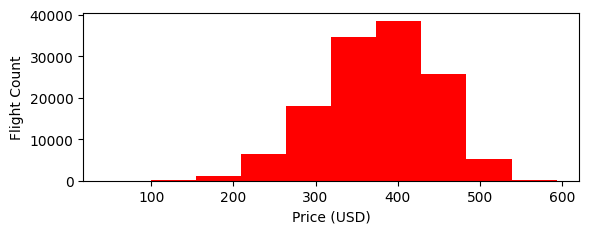

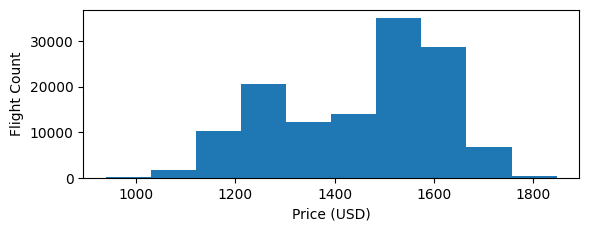

In [59]:
# Coach Ticket Prices
plt.subplot(2, 1, 1)
plt.hist(flight.coach_price, color='red')
plt.xlabel('Price (USD)')
plt.ylabel('Flight Count')
plt.show()

# First Class Ticket Prices
plt.subplot(2, 1, 2)
plt.hist(flight.firstclass_price)
plt.xlabel('Price (USD)')
plt.ylabel('Flight Count')
plt.show()

### Subsetting Data (Flights Over 8 Hours)

In [61]:
eight_hour_flights = flight[flight['hours'] >= 8]

### High & Low Values (8 Hour Flights)

In [68]:
eight_coach_high_val = np.max(eight_hour_flights['coach_price'])
print(f'The Priciest Coach Ticket For Flights Over Eight Hours Is: ${round(eight_coach_high_val, 2)}')
eight_coach_low_val = np.min(eight_hour_flights['coach_price'])
print(f'The Cheapest Coach Ticket For Flights Over Eight Hours Is: ${round(eight_coach_low_val, 2)}')
print()
eight_firstclass_high_val = np.max(eight_hour_flights['firstclass_price'])
print(f'The Priciest First-Class Ticket For Flights Over Eight Hours Is: ${round(eight_firstclass_high_val, 2)}')
eight_firstclass_low_val = np.min(eight_hour_flights['firstclass_price'])
print(f'The Cheapest First-Class Ticket For Flights Over Eight Hours Is: ${round(eight_firstclass_low_val, 2)}')

The Priciest Coach Ticket For Flights Over Eight Hours Is: $593.64
The Cheapest Coach Ticket For Flights Over Eight Hours Is: $170.77

The Priciest First-Class Ticket For Flights Over Eight Hours Is: $1846.14
The Cheapest First-Class Ticket For Flights Over Eight Hours Is: $1128.77


### Average Values (8 Hour Flights)

In [66]:
eight_coach_avg_val = np.mean(eight_hour_flights['coach_price'])
print(f'The Average Coach Price Is: ${round(eight_coach_avg_val, 2)}')
eight_firstclass_avg_val = np.mean(eight_hour_flights['firstclass_price'])
print(f'The Average First Class Price Is: ${round(eight_firstclass_avg_val, 2)}')

The Average Coach Price Is: $431.83
The Average First Class Price Is: $1571.5


### Visualizing Coach Ticket Prices (8 Hour Flights)

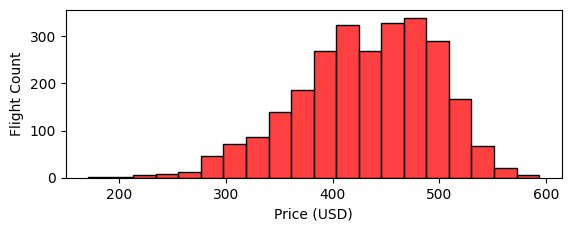

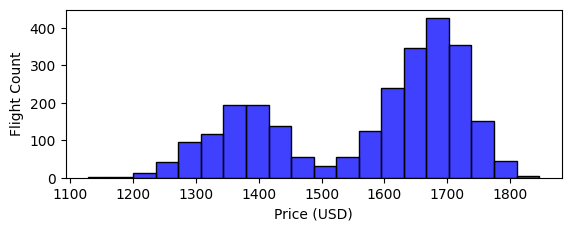

In [82]:
# Coach Ticket Prices
plt.subplot(2, 1, 1)
sns.histplot(eight_hour_flights.coach_price, color='red', bins=20)
plt.xlabel('Price (USD)')
plt.ylabel('Flight Count')
plt.show()

# First Class Ticket Prices
plt.subplot(2, 1, 2)
sns.histplot(eight_hour_flights.firstclass_price, color='blue', bins=20)
plt.xlabel('Price (USD)')
plt.ylabel('Flight Count')
plt.show()

### Flight Delays Above & Below 60 Minutes

In [71]:
flight_delays_over_1hour = flight[flight['delay'] >= 60]
flight_delays_under_1hour = flight[(flight['delay'] <= 60) & (flight['delay'] > 0)]

### Visualizing Flight Delay Times

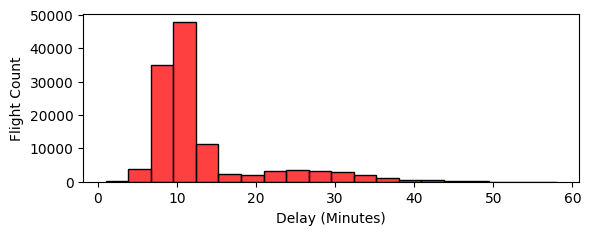

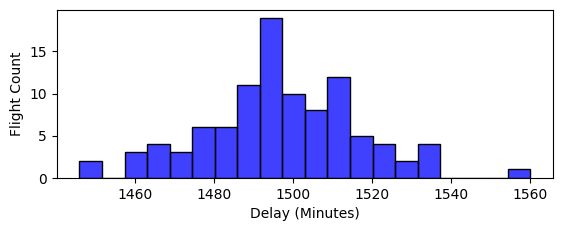

<Figure size 640x480 with 0 Axes>

In [87]:
# Less Than 1 Hour Delay
plt.subplot(2, 1, 1)
sns.histplot(flight_delays_under_1hour['delay'], bins=20, color='red')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Flight Count')
plt.show()
plt.clf()

# Over 1 Hour Delay
plt.subplot(2, 1, 2)
sns.histplot(flight_delays_over_1hour['delay'], bins=20, color='blue')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Flight Count')
plt.show()
plt.clf()

## Bivariate Analysis

### Visualizing Coach & First-Class Prices

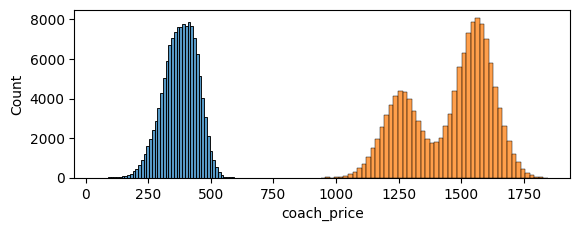

<Figure size 640x480 with 0 Axes>

In [195]:
# Coach Vs First Class Comparison
plt.subplot(2, 1, 1)
sns.histplot(flight['coach_price'], bins=50)
sns.histplot(flight['firstclass_price'], bins=50)
plt.show()
plt.clf()

### Relation Between Coach Prices To In-Flight Features

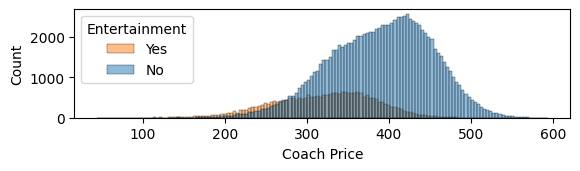

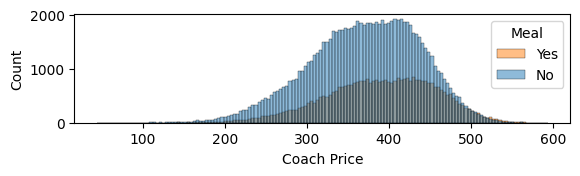

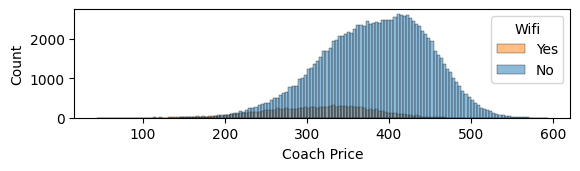

<Figure size 640x480 with 0 Axes>

In [223]:
### Entertainmnt Plot
plt.subplot(3, 1, 1)
sns.histplot(data=flight, x='coach_price', hue='inflight_entertainment')
plt.xlabel('Coach Price')
plt.ylabel('Count')
plt.legend(['Yes', 'No'], title='Entertainment')
plt.show()
plt.clf()

# Meal Plot
plt.subplot(3, 1, 2)
sns.histplot(data=flight, x='coach_price', hue='inflight_meal')
plt.xlabel('Coach Price')
plt.ylabel('Count')
plt.legend(['Yes', 'No'], title='Meal')
plt.show()
plt.clf()

# Wifi Plot
plt.subplot(3, 1, 3)
sns.histplot(data=flight, x='coach_price', hue='inflight_wifi')
plt.xlabel('Coach Price')
plt.ylabel('Count')
plt.legend(['Yes', 'No'], title='Wifi')
plt.show()
plt.clf()

### Subsetting Flights Over & Under 200 Passengers

In [27]:
over_200 = flight[flight['passengers'] >= 200]
under_200 = flight[(flight['passengers'] <= 199) & (flight['passengers'] >= 0)]

### Passenger Count In Relation To Flight Length

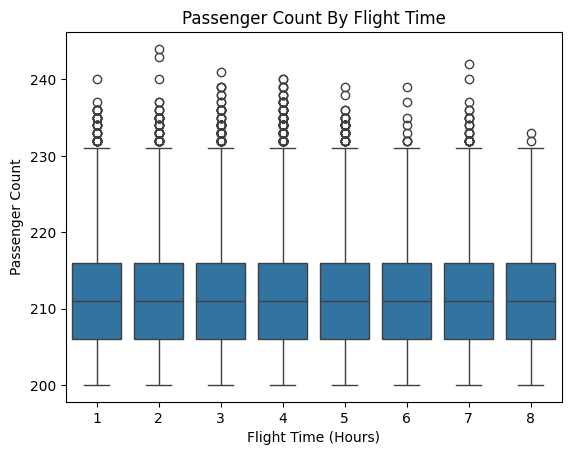

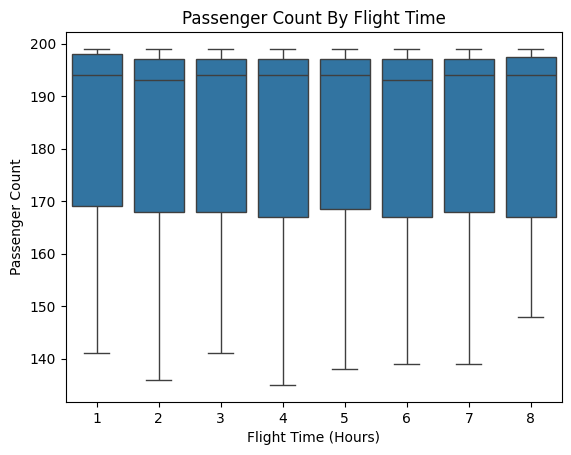

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


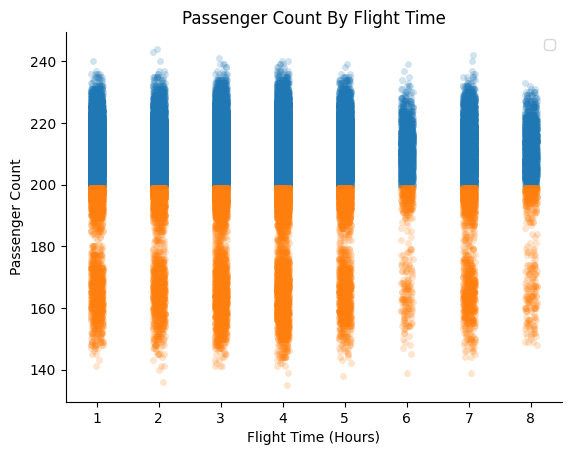

<Figure size 640x480 with 0 Axes>

In [28]:
sns.boxplot(x='hours', y='passengers', data=over_200)
plt.xlabel('Flight Time (Hours)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count By Flight Time')
plt.show()
plt.clf()

sns.boxplot(x='hours', y='passengers', data=under_200)
plt.xlabel('Flight Time (Hours)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count By Flight Time')
plt.show()
plt.clf()

sns.stripplot(x='hours', y='passengers', data=over_200, jitter=True, alpha=.20)
sns.stripplot(x='hours', y='passengers', data=under_200, jitter=True, alpha=.20)
sns.despine()
plt.xlabel('Flight Time (Hours)')
plt.ylabel('Passenger Count')
plt.title('Passenger Count By Flight Time')
plt.legend()
plt.show()
plt.clf()

## Multivariate Analysis

### Coach & First-Class Prices On Weekends Vs. Weekdays

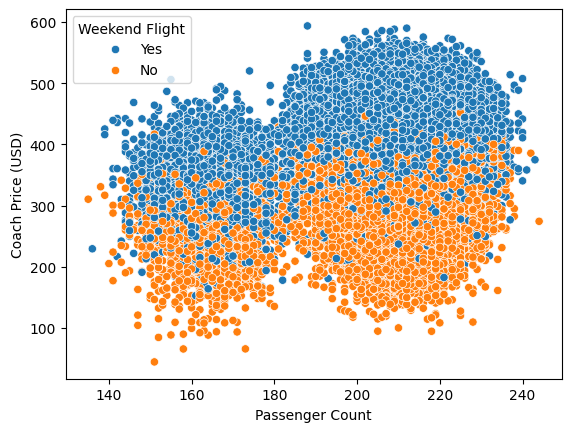

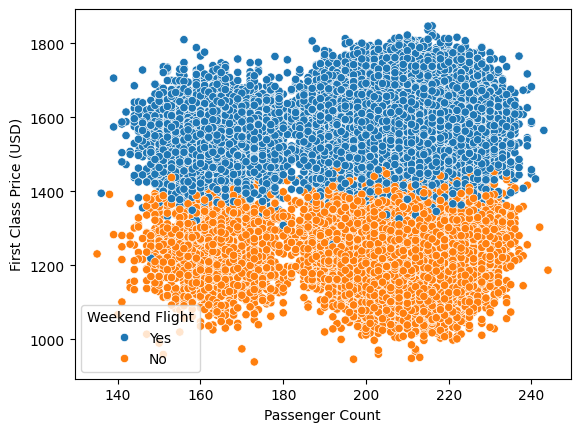

<Figure size 640x480 with 0 Axes>

In [16]:
# Coach Analysis
sns.scatterplot(data=flight, x='passengers', y='coach_price', hue='weekend')
plt.xlabel('Passenger Count')
plt.ylabel('Coach Price (USD)')
plt.legend(title='Weekend Flight')
plt.show()
plt.clf()

# First Class Analysis
sns.scatterplot(data=flight, x='passengers', y='firstclass_price', hue='weekend')
plt.xlabel('Passenger Count')
plt.ylabel('First Class Price (USD)')
plt.legend(title='Weekend Flight')
plt.show()
plt.clf()

### Coach Price Differential: Redeyes On Each Day

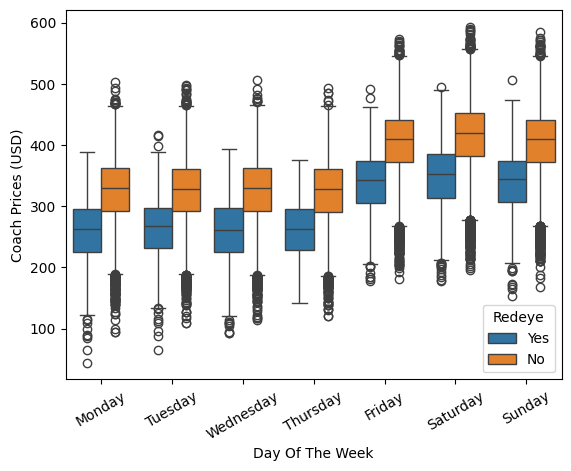

In [34]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='redeye', order=days_order)
plt.xlabel('Day Of The Week')
plt.ylabel('Coach Prices (USD)')
plt.xticks(rotation=30)
plt.legend(title='Redeye')
plt.show()